In [16]:
import pandas as pd
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Look for potential patterns in the proofs that weres successfully repaired the models


In [4]:
def load_all_json_files(root_dir, target_file_name):
    combined_list = []

    for root, _, files in os.walk(root_dir):
        for file in files:
            if file == target_file_name:
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                combined_list.extend(data)

    return combined_list

In [31]:
# get all the instances of successful 
df = pd.read_csv("pipeline/scraper/processed_data/mathlib4_repair.csv")
random_test_df = pd.read_csv("pipeline/scraper/processed_data/random/test.csv")
by_file_test_df = pd.read_csv("pipeline/scraper/processed_data/by_file/test.csv")
all_successes_idx = load_all_json_files("experiments", "all_success.json")
all_success_df = df[df.index.isin(all_successes_idx)]

In [45]:
# get distribution of theorem
success_proof_len = all_success_df.proof.apply(len)
success_failed_proof_len = all_success_df.failed_proof.apply(len)
success_statement_len = all_success_df.statement.apply(len)
success_error_len = all_success_df.error_msg.apply(len)

random_proof_len = random_test_df.proof.apply(len)
random_failed_proof_len = random_test_df.failed_proof.apply(len)
random_statement_len = random_test_df.statement.apply(len)
random_error_len = random_test_df.error_msg.apply(len)

by_file_proof_len = by_file_test_df.proof.apply(len)
by_file_failed_proof_len = by_file_test_df.failed_proof.apply(len)
by_file_statement_len = by_file_test_df.statement.apply(len)
by_file_error_len = by_file_test_df.error_msg.apply(len)

In [46]:
def plot_distributions(ax, success_data, random_test_data, by_file_test_data, title, xlabel):
    sns.kdeplot(success_data, color="blue", linestyle='-', linewidth=2, ax=ax, label="Success")
    sns.kdeplot(random_test_data, color="green", linestyle='-', linewidth=2,  ax=ax, label="Random Test")
    sns.kdeplot(by_file_test_data, color="red", linestyle='-', linewidth=2,  ax=ax, label="By-file Test")


    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.set_yticks([])
    ax.legend()

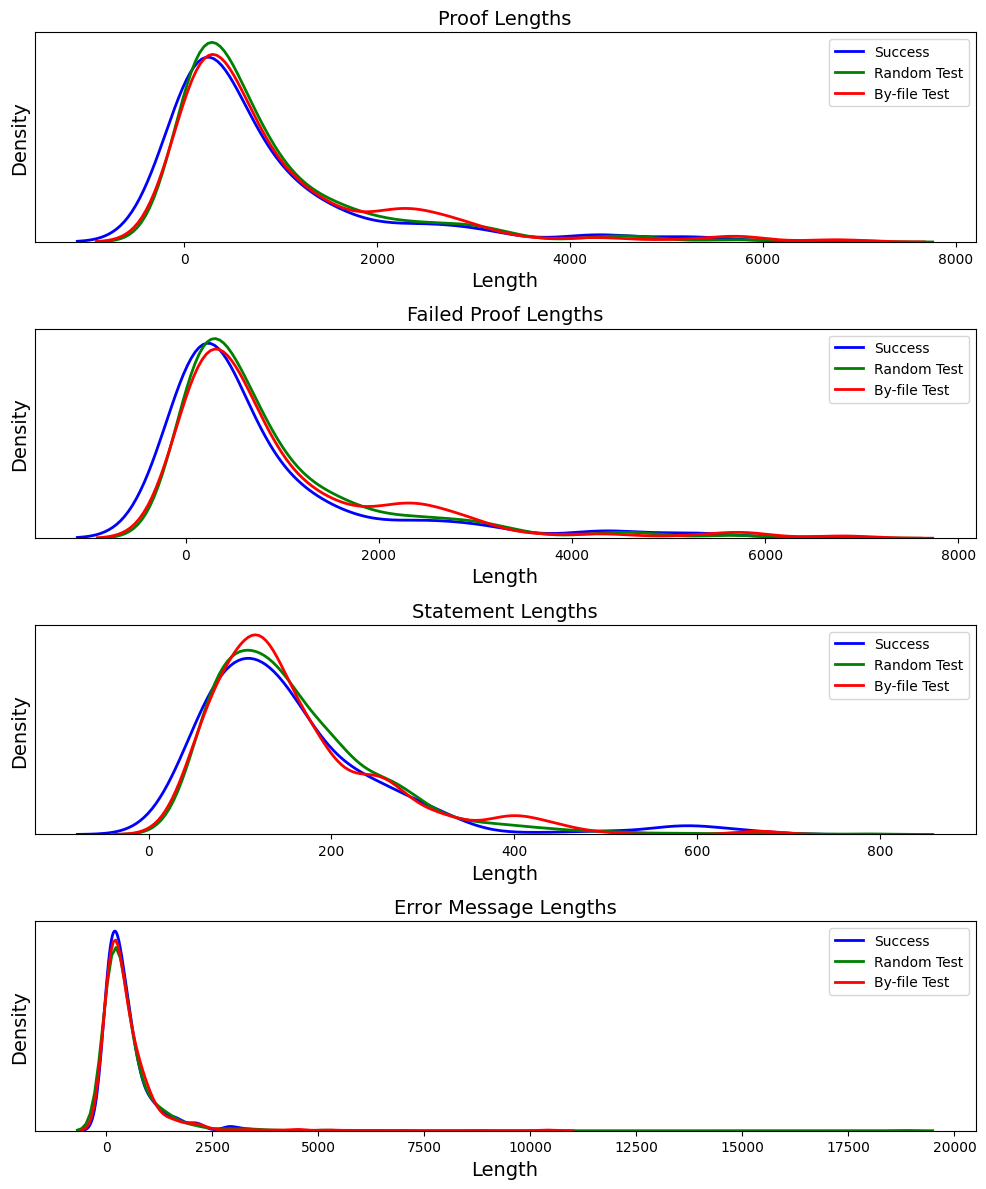

In [48]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 12))  # 4 rows, 1 column

# Plot each distribution
plot_distributions(axs[0], success_proof_len, random_proof_len, by_file_proof_len, "Proof Lengths", "Length")
plot_distributions(axs[1], success_failed_proof_len, random_failed_proof_len, by_file_failed_proof_len, "Failed Proof Lengths", "Length")
plot_distributions(axs[2], success_statement_len, random_statement_len, by_file_statement_len, "Statement Lengths", "Length")
plot_distributions(axs[3], success_error_len, random_error_len, by_file_error_len, "Error Message Lengths", "Length")

# Adjust layout
plt.tight_layout()
plt.show()

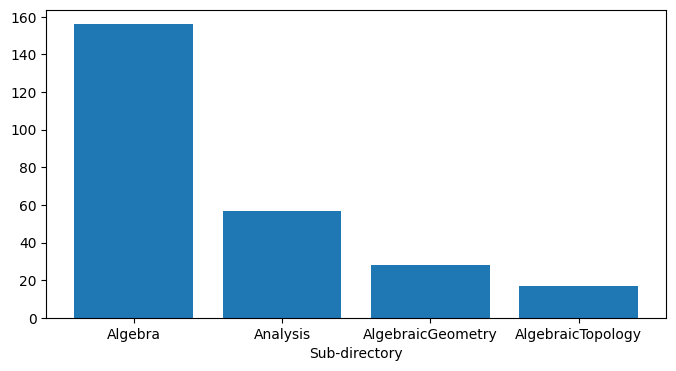

In [53]:
# sub-directories with proof repaired
all_success_subdir = all_success_df.filepath.apply(lambda x: x.split("/")[1])
counts = all_success_subdir.value_counts()
plt.figure(figsize=(8, 4))
plt.bar(counts.keys(), counts.values)
plt.xlabel("Successfully Repaired Proof Count")
plt.xlabel("Sub-directory")
plt.show()

# Inspect the predictions made by ByT5 models in Experiment 2

In [4]:
# look at the frequency counts of the substrings (without spaces)
df = pd.read_csv("experiments/byt5_small/finetuned/by_file/test_by_file_by_t5_small_tuned_prediction.csv")
predictions = df.predicted_proof.values
word_counts = Counter(word for string in predictions for word in string.split())

In [16]:
word_counts

Counter({'Finset.mem_univ,': 105316,
         'Finset.coe_image,': 7868,
         'Function.comp_apply,': 5241,
         'h': 3945,
         '=>': 3936,
         '·': 2077,
         '⟨fun': 2039,
         '?_⟩': 2015,
         'refine': 1938,
         '?_,': 1918,
         'fun': 1918,
         's': 1622,
         ':=': 1000,
         'by': 1000,
         'simp': 972,
         'only': 972,
         'with': 956,
         'a': 898,
         '[Finset.mem_univ,': 800,
         'classical': 782,
         "induction'": 782,
         'using': 782,
         'Finset.induction_on': 782,
         'ha': 782,
         'ih': 782,
         'Finset.mem_uni': 320,
         'mem_setOf_eq,': 246,
         'F': 237,
         'rcases': 174,
         '(rfl': 174,
         '|': 174,
         "h's)": 174,
         'eq_or_ne': 116,
         '0': 116,
         'exact': 104,
         'Fin': 98,
         '[Finset.coe_image,': 61,
         'eq_empty_or_nonempty': 58,
         'Finse': 57,
         '[mem_setOf_eq,'